In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

(750, 750, 3)


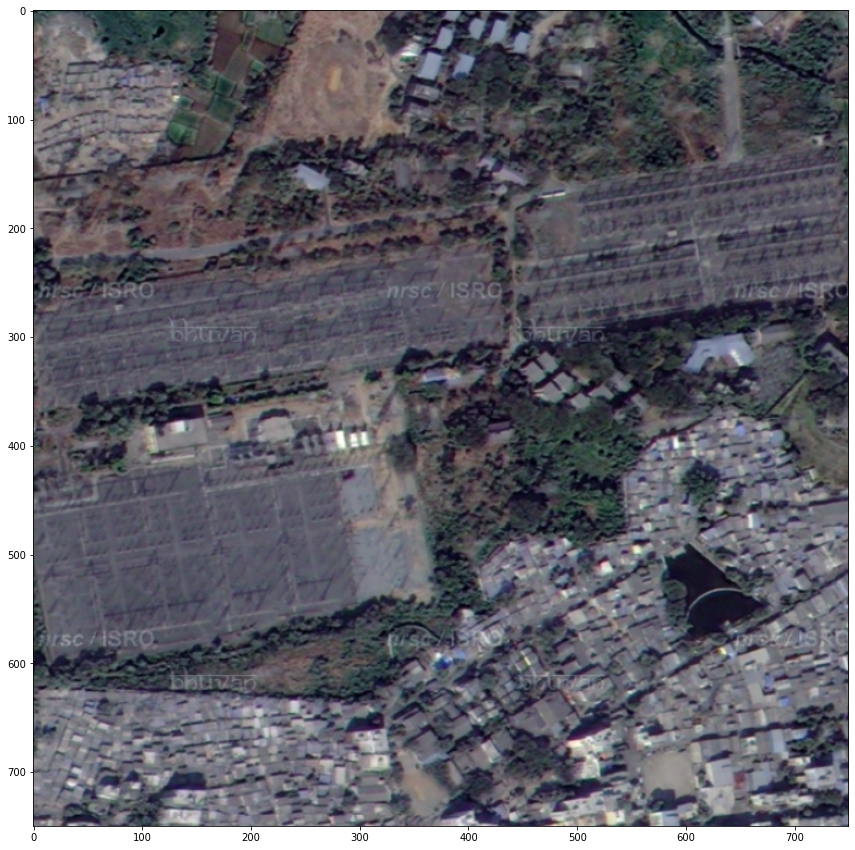

In [29]:
index = 0
image = plt.imread(os.path.join(os.getcwd(),'mosaic_test.jpg'))
x,y = (index)//5  , (index+1)%5
if(y==0):   
    y=5
img_crop=image[(x)*750:(x+1)*750,(y-1)*750:(y)*750,:]
plt.imshow(img_crop)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<h3>Loading images

In [19]:
image_names= os.listdir('./Data_ML/image_chips/')
image_names[:5]#visualising top 5 image names

['H166.jpg', 'L704.jpg', 'H006.jpg', 'J189.jpg', 'J638.jpg']

In [20]:
from PIL import Image
im = Image.open(os.path.join(os.getcwd(),'Data_ML','image_chips',image_names[1]))
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x750 at 0x11A4D5BB0>


<h3>Visualising the image

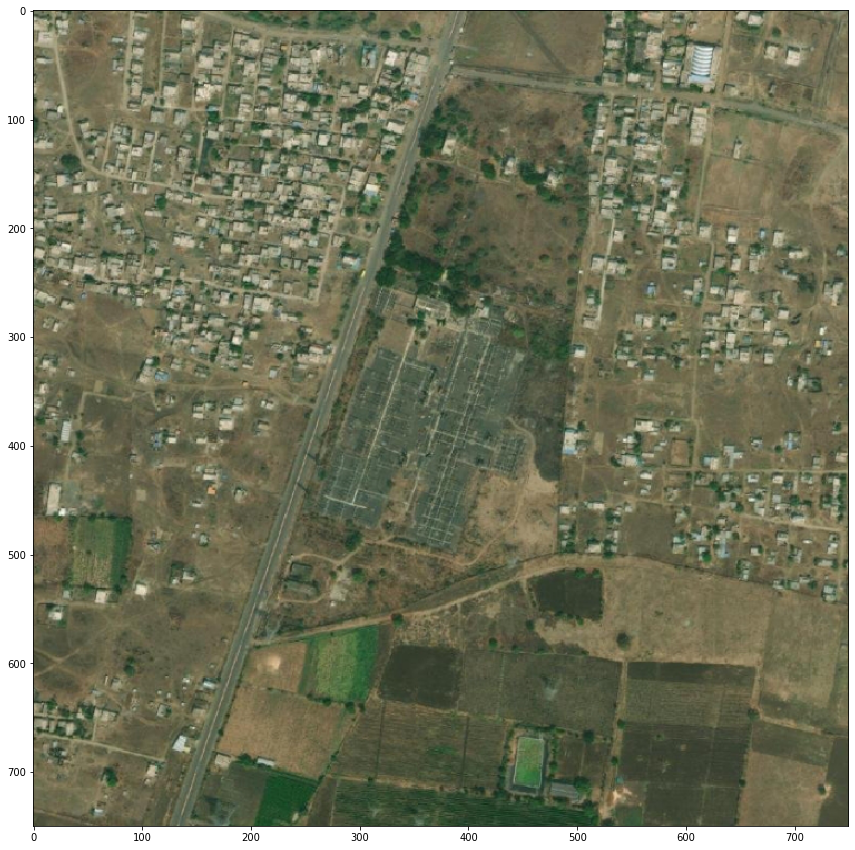

In [21]:
root = os.getcwd() #getting current working directory
idx = 0 #change idx to visualise different images from the image_names list
name = image_names[idx]
image_path = os.path.join(root,'Data_ML','image_chips',name)
img = plt.imread(image_path)
plt.imshow(img)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<h3>Loading mask

In [22]:
mask_name = name[:-4] + '.csv' #removing .jpg from the name and adding .csv for reading mask
mask_path = os.path.join(root,'Data_ML','target_feature_AOI',mask_name)
mask_data = pd.read_csv(mask_path)
coordinates = mask_data.WKT.values[0][16:-3].split(',')

x = []
y = []

for c in coordinates:
    x.append(float(c.split(' ')[0]))
    y.append(float(c.split(' ')[1]))

x = np.array(x)
y = np.array(y)

Path(array([[ 312.08333333, -312.91666667],
       [ 257.08333333, -467.91666667],
       [ 282.91666667, -473.75      ],
       [ 282.91666667, -470.41666667],
       [ 285.41666667, -468.75      ],
       [ 290.41666667, -467.08333333],
       [ 293.75      , -467.91666667],
       [ 298.75      , -472.08333333],
       [ 316.25      , -476.25      ],
       [ 334.58333333, -414.58333333],
       [ 362.91666667, -421.25      ],
       [ 343.75      , -484.58333333],
       [ 391.25      , -497.08333333],
       [ 412.08333333, -419.58333333],
       [ 442.91666667, -423.75      ],
       [ 451.25      , -392.08333333],
       [ 430.41666667, -388.75      ],
       [ 453.75      , -317.91666667],
       [ 429.58333333, -312.91666667],
       [ 429.58333333, -291.25      ],
       [ 403.75      , -285.41666667],
       [ 401.25      , -300.41666667],
       [ 366.25      , -291.25      ],
       [ 341.25      , -321.25      ],
       [ 312.08333333, -312.91666667]]), None)
(562500, 2)


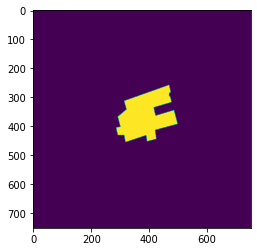

In [43]:
from matplotlib.path import Path
points = ([tuple(float(i) for i in x.split()) for x in coordinates])
h , w = 750, 750
point_path = Path(points)
print(point_path)
x, y = np.mgrid[:h, :w]
y = - y
coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1)))
print(coors.shape)
masked_image = point_path.contains_points(coors)
print(coors)
print(sum(masked_image))
plt.imshow(masked_image.reshape(h, w))
plt.show()


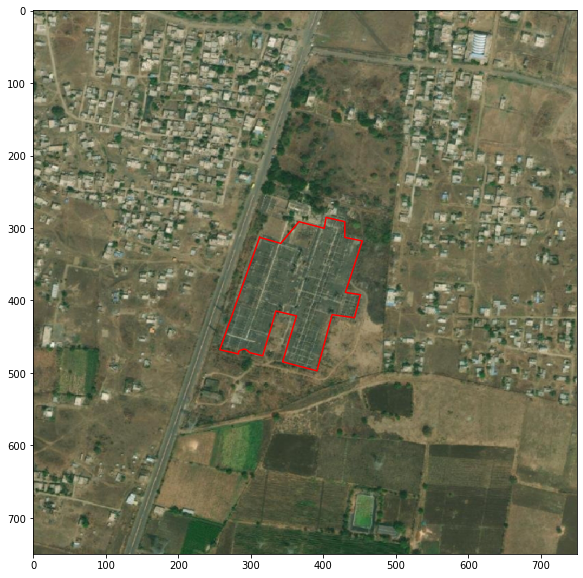

In [29]:
plt.imshow(img)
plt.plot(x,-y,c='r')# plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()